In [10]:
#!pip install dlib

In [11]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib
from imutils import face_utils

In [12]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
path = '/content/drive/MyDrive/TGMT'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['image_40.jpg', 'image_20.jpg', 'Colab Notebooks', 'models']

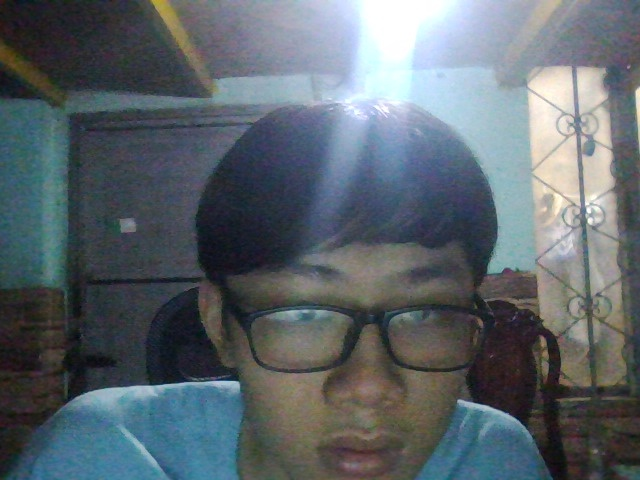

In [14]:
img = cv2.imread(path + '/image_40.jpg')
cv2_imshow(img)

/content/drive/MyDrive/TGMT/models/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/TGMT/models/dlib_face_recognition_resnet_model_v1.dat
-0.116709
0.0734989
0.0660994
-0.0645636
-0.0211937
-0.0764243
-0.0117321
-0.0978397
0.16679
-0.111397
0.289347
-0.0310359
-0.175126
-0.149923
0.0022634
0.137325
-0.178023
-0.100186
-0.0703141
-0.103446
-0.0169024
-0.0706445
-0.00563353
0.0941852
-0.111341
-0.312081
-0.0530592
-0.133608
0.0128812
-0.104207
0.0308349
0.105855
-0.172872
0.00135178
-0.0301912
0.0920962
-0.0158289
-0.0094517
0.153467
-0.0438707
-0.121926
-0.0221656
-0.000335477
0.224034
0.175921
0.0238758
0.0195268
-0.0486444
0.085191
-0.174587
0.0270744
0.167943
0.0284298
0.0770718
0.0407975
-0.154398
0.0107588
0.0727174
-0.180295
0.0207478
-0.0105897
-0.0852793
-0.0865805
-0.044539
0.227732
0.121669
-0.144693
-0.1291
0.184641
-0.176889
-0.0193245
0.0782129
-0.126725
-0.177885
-0.227281
0.0660437
0.399156
0.161965
-0.160116
0.0493855
-0.155139
-0.0879276
0.0275116
0.111757
-

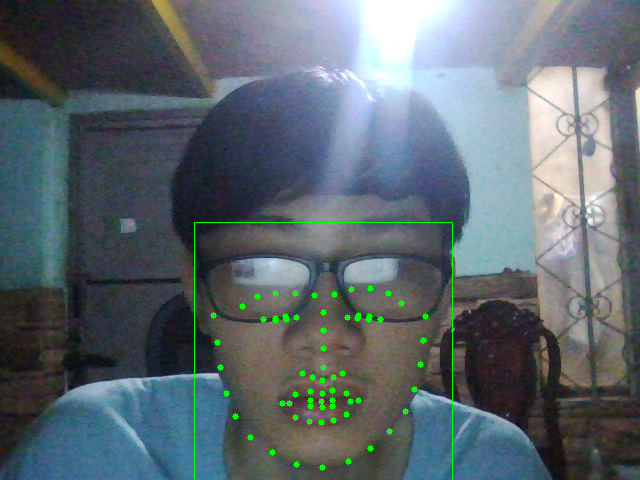

In [23]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path + "/image_400.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)